![](https://www.destructoid.com/wp-content/themes/destructoid/inc/images/destructoid-logo-large.png)

 # - WebScraping Destructoid -
 ### by Henrique Alves de Lima

 
 ## In this notebook, im going to do a web scraping and data analysis on Destructoid website. My work consists in scrap all the names, scores, reviewers and when the review has been sent on site, and do an initial analysis...


 ## Hope you enjoy =D 

In [556]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [557]:
title = []
score = []
reviewer = []
posted = []

In [558]:
url = 'https://www.destructoid.com/reviews/'

In [559]:
html = requests.get(url)

In [560]:
list_url = []

In [561]:
for i in range(2,312):
    list_url.append(f'https://www.destructoid.com/reviews/page/{i}/');

In [562]:
soup = BeautifulSoup(html.text, 'html.parser')

In [563]:
#Título
soup.find_all(class_ = 'post-title');

In [564]:
#Score
soup.find_all(class_ = 'review-score');
#Skipar os 3 Primeiros

In [565]:
#Postado em:
soup.find_all(class_ = 'posted-on');
#Skipar 3 Primeiros

In [566]:
for row in soup.find_all(class_ = 'post-title'):
    title.append(row.text.replace('Review: ', ''))

In [567]:
count = 0
for row in soup.find_all(class_ = 'review-score'):
    count+=1

count

23

In [568]:
for i in range(3, 13, 1) :
    score.append(soup.find_all(class_ = 'review-score')[i].text.replace('\n', ''))

In [569]:
for i in range(3, 13, 1):
    reviewer.append(soup.find_all('span', attrs={'class':''})[i].text.replace('By ', ''))

In [570]:
for i in range(3,13,1):
    posted.append(soup.find_all(class_ = 'posted-on')[i].text)

In [571]:
posted

['4 days ago',
 '4 days ago',
 '5 days ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '1 week ago',
 '2 weeks ago',
 '2 weeks ago',
 '3 weeks ago']

In [572]:
for lista in list_url:
    url = lista
    html = requests.get(url)
    soup = BeautifulSoup(html.text, 'html.parser')

    for row in soup.find_all(class_ = 'post-title'):
        title.append(row.text.replace('Review: ', ''))
    
    for i in range(3, 16, 1) :
        score.append(soup.find_all(class_ = 'review-score')[i].text.replace('\n', ''))
    
    for i in range(3, 16, 1):
        reviewer.append(soup.find_all('span', attrs={'class':''})[i].text.replace('By ', ''))
    
    for i in range(3, 16,1):
        posted.append(soup.find_all(class_ = 'posted-on')[i].text)
    
    
    
    

In [573]:
df = pd.DataFrame({'Jogo':title, 'Nota':score, 'Revisor':reviewer, 'Postado':posted})

## Ok, now we have our dataframe, this is amazing! =D
### Let's see it

In [574]:
df

,Jogo,Nota,Revisor,Postado
0,Mon Amour,6,Zoey Handley,4 days ago
1,Nickelodeon All-Star Brawl,7,CJ Andriessen,4 days ago
2,The Good Life,6,Eric Van Allen,5 days ago
3,Demon Slayer: Kimetsu no Yaiba,6.5,Chris Carter,1 week ago
4,Jackbox Party Pack 8,7.5,Noelle Warner,1 week ago
...,...,...,...,...
4035,Destructoid review: Super Smash Bros. Brawl,9.5,Aaron Linde,14 years ago
4036,Destructoid review: N+,9.5,Anthony Burch,14 years ago
4037,Destructoid review: Geometry Wars: Galaxies,8.5,Nick Chester,14 years ago
4038,Destructoid review: Rock Band,9.5,Nick Chester,14 years ago


In [575]:
df.Nota = df.Nota.astype(float)

### Reviewers with most 10 score reviews: 

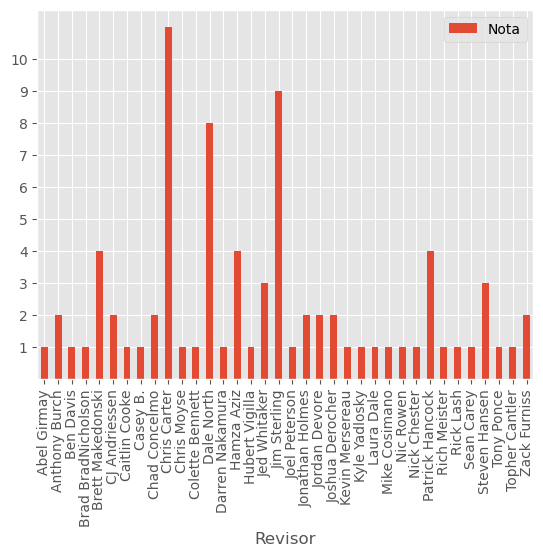

In [585]:
pd.DataFrame(df[df['Nota'] == 10].groupby(['Revisor'])['Nota'].count()).plot(kind = 'bar')
plt.style.use('ggplot')
plt.grid(True)
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.show()


### The lowest score:

In [605]:
df.Nota.min()

1.0

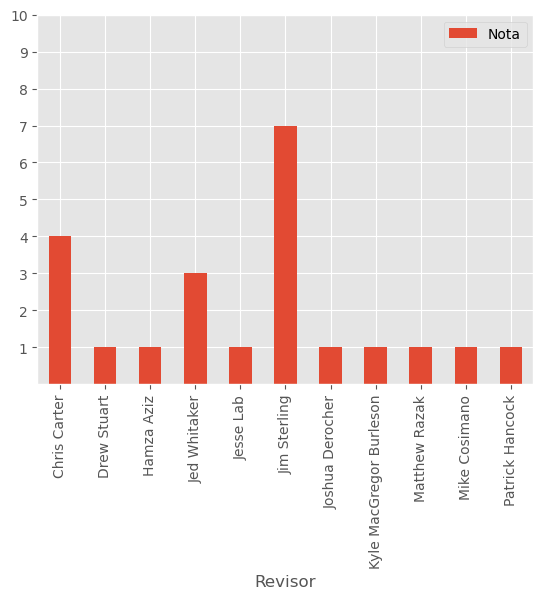

In [601]:
pd.DataFrame(df[df['Nota'] == 1].groupby(['Revisor'])['Nota'].count()).plot(kind = 'bar')
plt.style.use('ggplot')
plt.grid(True)
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.show()

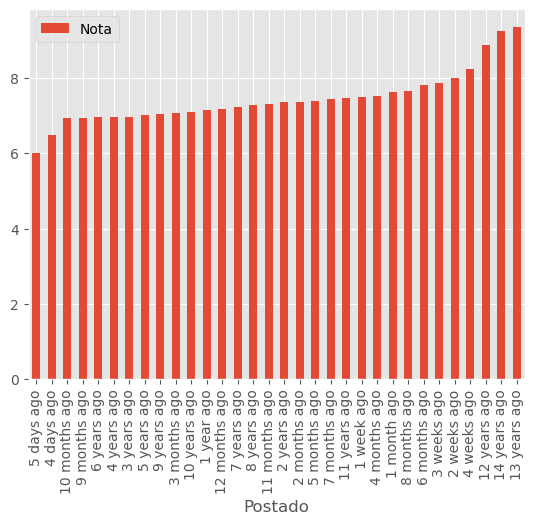

In [621]:
pd.DataFrame(df.groupby('Postado')['Nota'].mean()).sort_values('Nota').plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

## We can see that the older games have higher scores... Are the games getting worst or the reviewers less 'flexible' to bad games? :ThinkingFaceEmoji:

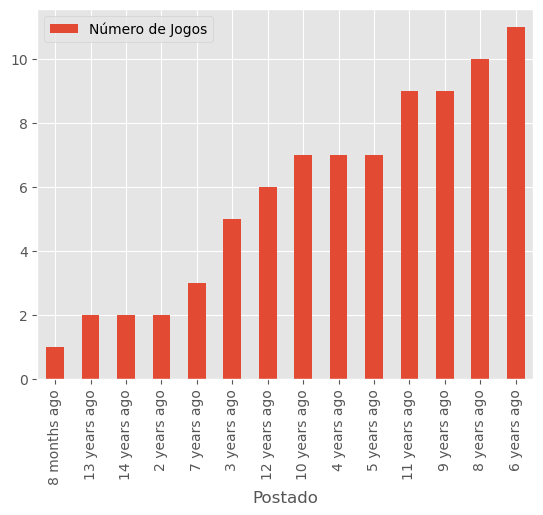

In [650]:
df1 = df[df.Nota == df.Nota.max()].groupby('Postado').count().drop(columns = ['Nota', 'Revisor'])
df1 = df1.rename({'Jogo':'Número de Jogos'}, axis = 1).sort_values('Número de Jogos')
df1.plot(kind = 'bar')
plt.show()

## Thats cool, 2015 is our year! That's the year with the most 10 score games =D
## Let's see these games 

In [655]:
df[(df['Postado'] == '6 years ago') & (df['Nota'] == 10)]

,Jogo,Nota,Revisor,Postado
1803,Stephen’s Sausage Roll,10.0,Patrick Hancock,6 years ago
1882,Devil Daggers,10.0,Zack Furniss,6 years ago
1901,Unravel,10.0,Caitlin Cooke,6 years ago
1918,The Witness,10.0,Brett Makedonski,6 years ago
2022,Downwell,10.0,Steven Hansen,6 years ago
2054,Undertale,10.0,Ben Davis,6 years ago
2070,Lovers in a Dangerous Spacetime,10.0,Jed Whitaker,6 years ago
2106,Tales from the Borderlands: Escape Plan Bravo,10.0,Darren Nakamura,6 years ago
2163,Her Story,10.0,Laura Dale,6 years ago
2206,"Invisible, Inc.",10.0,Steven Hansen,6 years ago


## Humm... Undertale is a truly superb game, but the others...
## What about the 2015 worst games?

In [656]:
df[(df['Postado'] == '6 years ago') & (df['Nota'] == 1)]

,Jogo,Nota,Revisor,Postado
1873,Slashy Souls,1.0,Chris Carter,6 years ago
1969,Dementium Remastered,1.0,Jed Whitaker,6 years ago
2049,Afro Samurai 2: Revenge of Kuma Volume 1,1.0,Chris Carter,6 years ago
2101,Risen 3: Titan Lords Enhanced Edition,1.0,Mike Cosimano,6 years ago
2110,Commander Cherry’s Puzzled Journey,1.0,Jed Whitaker,6 years ago


## Risen 3 deserves a number 1 score?

## Ok, it's time to stop xD

## I hope that you did enjoy this short notebook. See you soon guys =D

### Cheers